In [ ]:
!pip install git+https://github.com/openai/whisper.git
!pip install ffmpeg


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-awcnld1_
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-awcnld1_
  Resolved https://github.com/openai/whisper.git to commit 25639fc17ddc013d56c594bfbf7644f2185fad84
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.1 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803321 sha256=1b63185dde79d9a99ea417b2fcd3b75d8283ddf1dd85db34a5d7fe8710cf00d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-bm558_jr/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=

In [ ]:
import os
import whisper

# Load the Whisper model (base model is lightweight, you can also use 'tiny', 'medium', or 'large')
model = whisper.load_model("base")

# Function to convert MP3 files to text using Whisper
def convert_mp3_to_text(mp3_folder, text_output_folder):
    mp3_files = [f for f in os.listdir(mp3_folder) if f.endswith('.mp3')]

    if not os.path.exists(text_output_folder):
        os.makedirs(text_output_folder)

    for mp3_file in mp3_files:
        mp3_path = os.path.join(mp3_folder, mp3_file)
        print(f"Processing file: {mp3_file}")

        # Use Whisper to transcribe the MP3 file
        result = model.transcribe(mp3_path)

        # Get the text from the result
        transcription = result['text']

        # Save transcription to a text file
        text_filename = mp3_file.replace(".mp3", ".txt")
        text_path = os.path.join(text_output_folder, text_filename)

        with open(text_path, "w") as text_file:
            text_file.write(transcription)

        print(f"Transcription saved as {text_filename}")

# Example usage
mp3_folder_path = '/content/drive/MyDrive/mp3_files'  # Change to your Google Drive folder path
text_output_folder = '/content/drive/My Drive/transcriptions/'

convert_mp3_to_text(mp3_folder_path, text_output_folder)


100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 98.0MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

Processing file: Experts_Predict_the_Future_of_Technology__AI___Humanity___Tech_Support___WIRED.mp3
Transcription saved as Experts_Predict_the_Future_of_Technology__AI___Humanity___Tech_Support___WIRED.txt
Processing file: AI_for_good__Experts_debate_regulation__innovation_and_global_access.mp3
Transcription saved as AI_for_good__Experts_debate_regulation__innovation_and_global_access.txt
Processing file: AI_Finds_160_000_New_Viruses___Microsoft_s_Nuclear-Powered_AI.mp3
Transcription saved as AI_Finds_160_000_New_Viruses___Microsoft_s_Nuclear-Powered_AI.txt
Processing file: 2024_Summit_Of_The_Future__World_Leaders__Experts_Discuss_Collaboration_On_Information_Technology.mp3
Transcription saved as 2024_Summit_Of_The_Future__World_Leaders__Experts_Discuss_Collaboration_On_Information_Technology.txt
Processing file: Ethical_Implications_of_AI__According_to_AI_Experts.mp3
Transcription saved as Ethical_Implications_of_AI__According_to_AI_Experts.txt
Processing file: The_Impact_of_AI_on_Eve

In [ ]:
!pip install wordcloud matplotlib nltk transformers gensim


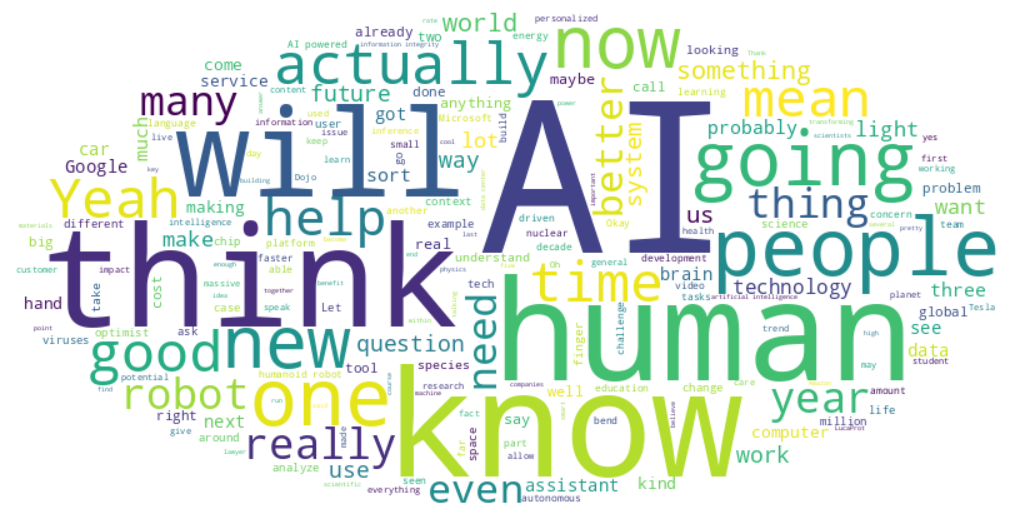

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

def generate_elliptical_word_cloud(text_folder):
    combined_text = ""

    # Read all text files and combine them into one large text string
    text_files = [f for f in os.listdir(text_folder) if f.endswith('.txt')]
    for text_file in text_files:
        with open(os.path.join(text_folder, text_file), 'r') as file:
            combined_text += file.read() + " "

    # Create an elliptical mask
    x, y = np.ogrid[:400, :800]
    mask = (x - 200) ** 2 / 40000 + (y - 400) ** 2 / 160000 > 1  # Ellipse equation
    mask = 255 * mask.astype(int)

    # Create the word cloud with centered words and elliptical layout
    wordcloud = WordCloud(
        background_color='white',
        mask=mask,           # Applying the elliptical mask
        contour_color='white',  # Outline the shape for visibility
        contour_width=1,      # Width of the outline
        prefer_horizontal=0.9, # Horizontal preference for most words
        colormap="viridis"     # Color scheme (optional)
    ).generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.tight_layout(pad=0)
    plt.show()

# Example usage
text_folder_path = '/content/drive/My Drive/transcriptions/'  # Path to your text files
generate_elliptical_word_cloud(text_folder_path)


In [ ]:
from transformers import pipeline
import os
import nltk

nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Load pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def chunk_text(text, max_length=512):
    """Splits text into chunks with a maximum length of `max_length` tokens."""
    sentences = sent_tokenize(text)  # Split text into sentences
    chunks = []
    current_chunk = []
    current_length = 0

    for sentence in sentences:
        sentence_length = len(sentence.split())

        # If adding another sentence exceeds max_length, start a new chunk
        if current_length + sentence_length > max_length:
            chunks.append(" ".join(current_chunk))
            current_chunk = []
            current_length = 0

        current_chunk.append(sentence)
        current_length += sentence_length

    # Add any remaining sentences in the last chunk
    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks

def perform_sentiment_analysis(text_folder):
    sentiment_results = []

    # Read all text files and analyze their sentiment
    text_files = [f for f in os.listdir(text_folder) if f.endswith('.txt')]
    for text_file in text_files:
        with open(os.path.join(text_folder, text_file), 'r') as file:
            text = file.read()
            chunks = chunk_text(text, max_length=512)  # Split text into smaller chunks
            file_sentiment = []

            for chunk in chunks:
                try:
                    result = sentiment_analyzer(chunk)
                    file_sentiment.extend(result)
                except Exception as e:
                    print(f"Error processing chunk: {e}")

            sentiment_results.append((text_file, file_sentiment))

    # Print the results for each file
    for file, sentiments in sentiment_results:
        print(f"Sentiment analysis for {file}:")
        for sentiment in sentiments:
            print(sentiment)

# Example usage
text_folder_path = '/content/drive/My Drive/transcriptions/'  # Path to your text files
perform_sentiment_analysis(text_folder_path)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Token indices sequence length is longer than the specified maximum sequence length for this model (638 > 512). Running this sequence through the model will result in indexing errors


Error processing chunk: The size of tensor a (638) must match the size of tensor b (512) at non-singleton dimension 1
Error processing chunk: The size of tensor a (584) must match the size of tensor b (512) at non-singleton dimension 1
Error processing chunk: The size of tensor a (580) must match the size of tensor b (512) at non-singleton dimension 1
Error processing chunk: The size of tensor a (523) must match the size of tensor b (512) at non-singleton dimension 1
Error processing chunk: The size of tensor a (639) must match the size of tensor b (512) at non-singleton dimension 1
Error processing chunk: The size of tensor a (655) must match the size of tensor b (512) at non-singleton dimension 1
Error processing chunk: The size of tensor a (601) must match the size of tensor b (512) at non-singleton dimension 1
Error processing chunk: The size of tensor a (622) must match the size of tensor b (512) at non-singleton dimension 1
Error processing chunk: The size of tensor a (642) must 

In [ ]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import os

nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess the text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Thematic analysis using LDA (Latent Dirichlet Allocation)
def perform_thematic_analysis(text_folder, num_topics=5):
    all_texts = []

    # Read all text files and preprocess them
    text_files = [f for f in os.listdir(text_folder) if f.endswith('.txt')]
    for text_file in text_files:
        with open(os.path.join(text_folder, text_file), 'r') as file:
            text = file.read()
            tokens = preprocess_text(text)
            all_texts.append(tokens)

    # Create a dictionary and a corpus
    dictionary = corpora.Dictionary(all_texts)
    corpus = [dictionary.doc2bow(text) for text in all_texts]

    # Train LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Print the topics found
    topics = lda_model.print_topics(num_words=5)
    for topic in topics:
        print(topic)

# Example usage
perform_thematic_analysis(text_folder_path, num_topics=5)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(0, '0.001*"ai" + 0.001*"like" + 0.001*"information" + 0.001*"think" + 0.001*"people"')
(1, '0.038*"ai" + 0.011*"like" + 0.008*"data" + 0.008*"human" + 0.008*"also"')
(2, '0.024*"like" + 0.023*"know" + 0.012*"yeah" + 0.010*"think" + 0.009*"mean"')
(3, '0.015*"ai" + 0.012*"like" + 0.010*"people" + 0.010*"think" + 0.009*"light"')
(4, '0.020*"information" + 0.011*"global" + 0.009*"integrity" + 0.007*"media" + 0.006*"misinformation"')
